# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [ ]:
# call_on_students(1)

#### Answer: 

- PCA Identifies the components that do the most to explain the dependent variable - set either as a percentage or a number of features


### 2: What are some reasons to use PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- in order to avoid the curse of dimensionality - you want to get as high of accuracy as possible, without bias increasing too far, so you need to use PCA to reduce the chance of too many features leading to overfitting, but also not choose too few that you have a bad model


### 3: Why is scaling important for PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- PCA is a distance-based approach to ID-ing useful features, so if different features have a different scale, PCA won't work properly


### 4: How can one determine how many principle components to use in a model?

In [ ]:
# call_on_students(1)

#### Answer: 

- set PCA as a % vs as a number


## PCA in Code

### Set Up

In [11]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- 


In [ ]:
# call_on_students(1)

In [12]:
# Code to preprocess X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

# Preview X
pd.DataFrame(data=X, columns= data['feature_names']).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [ ]:
# call_on_students(1)

In [13]:
# Code to import, instantiate and fit a PCA object

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)

PCA(n_components=2)

### 7: How Much Variance is Explained by the First 2 Components?

In [ ]:
# call_on_students(1)

In [15]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [14]:
# Code here to answer the question

# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.44272026 0.18971182]

 Total Variance Explained: 63.24


#### Answer:

-63.24% 


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- after it is initialized, it IDs the centers of the clusters based on the set number of clusters. based on the number, it uses a KNN approach to find the center of the largest number of points that fit a given cluster.


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- Inertia is the sum of squared error calculated from each instance of 𝑘 to find the best value of 𝑘, inertia decreases as there are more clusters (more clusters allows model to reduce the distance between points since a different cluster can hop in and take the slack


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- The silhouette score - instead of only counting for the distance to all other points in a given cluster, silhouette also accounts for the distance from the center to the points in its cluster and all points in clusters that it doesn't belong to.


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [16]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- Scale data 


In [ ]:
# call_on_students(1)

In [17]:
# Code to preprocess the data
# Name the processed data X_processed
scaler2 = StandardScaler()

X_processed = scaler2.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [22]:
# Import the relevent clustering algorithm

from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=2)


In [23]:
# Fit the object

clusters.fit(X_processed)

AgglomerativeClustering()

In [26]:
# Calculate a silhouette score

from sklearn.metrics import silhouette_score

predictions = clusters.fit_predict(X_processed)

actual = X

silhouette_score(actual, predictions)

0.6734178128853421

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [34]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    model = AgglomerativeClustering(n_clusters=n)
    
    model.fit(data)
    # Print the silhouette score
    predictions = model.fit_predict(data)
    
    print('silhouette score is:', silhouette_score(data, predictions))
    # Return the labels attribute from the fit clustering model
    return model.labels_
    pass

In [35]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

silhouette score is: 0.5770346019475989
silhouette score is: 0.446689041028591
silhouette score is: 0.4006363159855973
silhouette score is: 0.33058726295230545
silhouette score is: 0.3148548010051283
silhouette score is: 0.316969830299128
silhouette score is: 0.310946529007258


# 3) Time Series

In [71]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- make sure the data is in datetime format


In [72]:
# call_on_students(1)

In [73]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [74]:
# Code here 
ap.Month = pd.to_datetime(ap.Month)

In [75]:
ap.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [76]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


### 15: Explore Patterns in the Data

In [77]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- change over time in the average, seasonality of trends, etc.


Second, plot this time series data. What kinds of patterns do you see in this dataset?

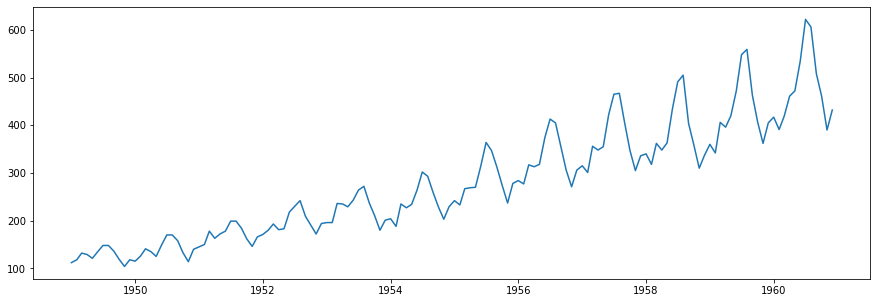

In [78]:
# Code to plot the time series
fig, ax = plt.subplots(figsize=(15, 5))

x = ap.Month
y = ap['#Passengers']

ax = plt.plot(x, y);

### 16: Explore the Moving Average

What window would make sense to use for this data?

- 12 - one window per year


In [79]:
# call_on_students(1)

In [80]:
x

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [81]:
y

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [82]:
# Code to create the moving average

data = pd.Series(y)

data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [83]:
moving_avg = data.rolling(window=12).mean()

moving_avg

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
139    463.333333
140    467.083333
141    471.583333
142    473.916667
143    476.166667
Name: #Passengers, Length: 144, dtype: float64

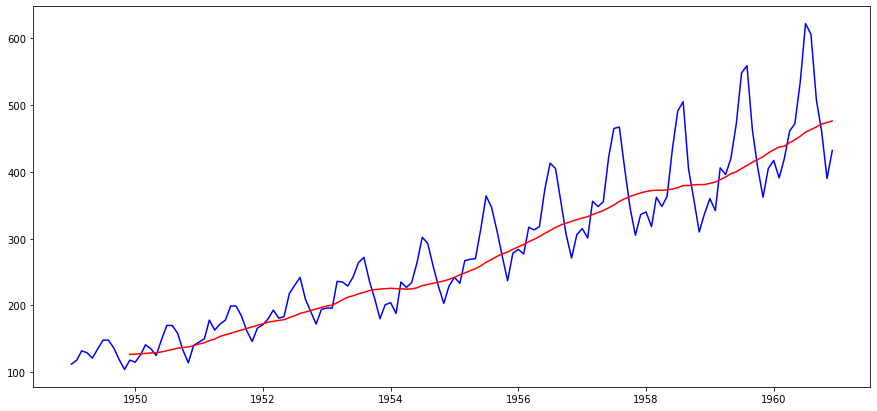

In [84]:
# Add to the moving average to the above plot

x_new = ap.Month
y_new = moving_avg

fig = plt.figure(figsize=(15, 7))
orig = plt.plot(x, y, color='blue', label='Original')
mean = plt.plot(x_new, y_new, color='red', label='Rolling Mean');



### 17: Explore Stationarity


In [85]:
# call_on_students(1)

Why do we try to make our data stationary?

- if data isn't stationary, it is very hard to forecast on stationary data


What can we do to make our data stationary?

- subtract the rolling mean or standard deviation, log transform or square root transofrm


### 18: Check Stationarity

In [86]:
# call_on_students(1)

In [87]:
def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)

In [88]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data)

display_df(dftest)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [89]:
# call_on_students(1)

In [90]:
# Code here to try to make the data stationary

rolling_subtracted = data - moving_avg


In [91]:
# Code here to check if the data is stationary
dftest = adfuller(rolling_subtracted.dropna())

display_df(dftest)

Test Statistic                  -3.164968
p-value                          0.022104
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

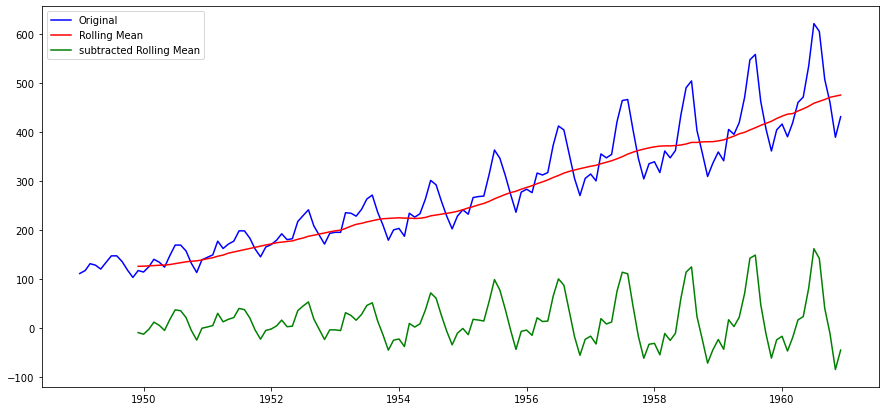

In [92]:

x_new2 = ap.Month
y_new2 = rolling_subtracted

fig = plt.figure(figsize=(15, 7))
orig = plt.plot(x, y, color='blue', label='Original')
mean = plt.plot(x_new, y_new, color='red', label='Rolling Mean')
rolling = plt.plot(x_new2, y_new2, color='green', label='subtracted Rolling Mean')
plt.legend(loc='best');


<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [93]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1.  remove casing
2.  remove random characters
3. remove stopwords

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- rows: sentence one, two, and 3, column for each word and a frequency count of each word in the given row, (zeros if the word isn't present in that given sentence)


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- term frequency-inverse document frequency identifies the importance or relevance of a word, and uses that to determine a given classification


## NLP in Code

### Set Up

In [94]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [95]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [96]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split

X_train, X_test, y_train, y_test = train_test_split(policies.policy, policies.candidate, random_state=42)

In [97]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer




In [98]:
# Instantiate it

vectorizer = CountVectorizer()

In [99]:
# Fit it

vectorizer.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [100]:
# Code here to transform train and test sets with the vectorizer

X_train_transformed = vectorizer.transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [101]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [102]:
# Code here to evaluate your model on the test set

rfc_model.score(X_test_transformed, y_test)

0.9375

In [103]:
rfc_model.score(X_train_transformed, y_train)

1.0